Getting dataset

In [1]:
# Importing the neccessary libraries
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


import gdown

# Downloading the Kaggle Dataset.
file_ids = ["1m99RBSAG4zIPOJ2nfRupHj-jZDteTr6G", "1p-bKN89n-r-HnDGRmVF2tDpvHA5DUv0w", "1XDBeNesyWO9YKVxh5fGtzQM4V-YXL_ZJ","1hakH4A1exZu58b8AEakkJFNktCGjMoAH","1Tf03LIjkD3GsLHO_meTUocIhdZ-uZHbM","1eInNXFn5ibTRT6R5P5ntn5jw8G-sWoPA","1YZymTI35b22W8Z_X371xAIYUWz7SztLW"]  # Add all file IDs here
destinations=["assessments.csv","courses.csv","studentAssessment.csv","studentInfo.csv","studentRegistration.csv","studentVle.csv","vle.csv"]
for i, file_id in enumerate(file_ids, 0):
    destination = f"file_{i}.csv"
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, destinations[i], quiet=False)
    print(f"Downloaded: {destinations[i]}")

Downloading...
From: https://drive.google.com/uc?id=1m99RBSAG4zIPOJ2nfRupHj-jZDteTr6G
To: c:\Users\admin\Documents\School\Student-Grade-Predictor\2)ML_Algo\assessments.csv
100%|██████████| 8.20k/8.20k [00:00<00:00, 22.0MB/s]


Downloaded: assessments.csv


Downloading...
From: https://drive.google.com/uc?id=1p-bKN89n-r-HnDGRmVF2tDpvHA5DUv0w
To: c:\Users\admin\Documents\School\Student-Grade-Predictor\2)ML_Algo\courses.csv
100%|██████████| 526/526 [00:00<00:00, 2.54MB/s]


Downloaded: courses.csv


Downloading...
From: https://drive.google.com/uc?id=1XDBeNesyWO9YKVxh5fGtzQM4V-YXL_ZJ
To: c:\Users\admin\Documents\School\Student-Grade-Predictor\2)ML_Algo\studentAssessment.csv
100%|██████████| 5.69M/5.69M [00:00<00:00, 84.3MB/s]


Downloaded: studentAssessment.csv


Downloading...
From: https://drive.google.com/uc?id=1hakH4A1exZu58b8AEakkJFNktCGjMoAH
To: c:\Users\admin\Documents\School\Student-Grade-Predictor\2)ML_Algo\studentInfo.csv
100%|██████████| 3.46M/3.46M [00:00<00:00, 78.9MB/s]


Downloaded: studentInfo.csv


Downloading...
From: https://drive.google.com/uc?id=1Tf03LIjkD3GsLHO_meTUocIhdZ-uZHbM
To: c:\Users\admin\Documents\School\Student-Grade-Predictor\2)ML_Algo\studentRegistration.csv
100%|██████████| 1.11M/1.11M [00:00<00:00, 39.2MB/s]


Downloaded: studentRegistration.csv


Downloading...
From (original): https://drive.google.com/uc?id=1eInNXFn5ibTRT6R5P5ntn5jw8G-sWoPA
From (redirected): https://drive.google.com/uc?id=1eInNXFn5ibTRT6R5P5ntn5jw8G-sWoPA&confirm=t&uuid=a35b8a73-39bd-4324-928b-7da039bc733b
To: c:\Users\admin\Documents\School\Student-Grade-Predictor\2)ML_Algo\studentVle.csv
100%|██████████| 454M/454M [00:04<00:00, 96.7MB/s] 


Downloaded: studentVle.csv


Downloading...
From: https://drive.google.com/uc?id=1YZymTI35b22W8Z_X371xAIYUWz7SztLW
To: c:\Users\admin\Documents\School\Student-Grade-Predictor\2)ML_Algo\vle.csv
100%|██████████| 260k/260k [00:00<00:00, 18.8MB/s]

Downloaded: vle.csv


Initialising df

In [7]:
import pandas as pd

# 1. Load your CSV files into DataFrames
df_assessments = pd.read_csv("assessments.csv")
df_courses = pd.read_csv("courses.csv")
df_studentAssessment = pd.read_csv("studentAssessment.csv")
df_studentInfo = pd.read_csv("studentInfo.csv")
df_studentRegistration = pd.read_csv("studentRegistration.csv")
df_studentVle = pd.read_csv("studentVle.csv")
df_vle = pd.read_csv("vle.csv")

# Count how many unique assessments exist for each module + presentation
df_course_assess_count = (
    df_assessments
    .groupby(["code_module", "code_presentation"])["id_assessment"]
    .count()
    .reset_index()
    .rename(columns={"id_assessment": "total_assessments"})
)

# Count how many assessments each student attempted
df_attempted_count = (
    df_studentAssessment
    .groupby("id_student")["id_assessment"]
    .count()
    .reset_index()
    .rename(columns={"id_assessment": "num_assessments_attempted"})
)

# Compute average score for each student
df_avg_score = (
    df_studentAssessment
    .groupby("id_student")["score"]
    .mean()  # or .sum() if you prefer total score
    .reset_index()
    .rename(columns={"score": "score"})
)

df_vle_clicks = (
    df_studentVle
    .groupby("id_student")["sum_click"]
    .sum()
    .reset_index()
    .rename(columns={"sum_click": "total_vle_clicks"})
)


# 3.1 Merge total_assessments (on code_module + code_presentation)
df_merged = pd.merge(
    df_studentInfo,
    df_course_assess_count,
    on=["code_module", "code_presentation"],
    how="left"
)

# 3.2 Merge attempted_assessments & average_score (on id_student)
df_merged = pd.merge(
    df_merged,
    df_attempted_count,
    on="id_student",
    how="left"
)

df_merged = pd.merge(
    df_merged,
    df_avg_score,
    on="id_student",
    how="left"
)

# 3.3 Merge total_vle_clicks (on id_student)
df_merged = pd.merge(
    df_merged,
    df_vle_clicks,
    on="id_student",
    how="left"
)

# Replace NaN with 0 if needed
df_merged["num_assessments_attempted"] = df_merged["num_assessments_attempted"].fillna(0)
df_merged["total_assessments"] = df_merged["total_assessments"].fillna(0)
df_merged["score"] = df_merged["score"].fillna(0)  # if missing, assume 0 or handle differently
df_merged["total_vle_clicks"] = df_merged["total_vle_clicks"].fillna(0)

# Compute ratio safely
def completion_ratio(row):
    if row["total_assessments"] == 0:
        return 0
    return row["num_assessments_attempted"] / row["total_assessments"]

df_merged["assessment_completion_ratio"] = df_merged.apply(completion_ratio, axis=1)

# Filter out withdrawn
df_merged = df_merged[
    (df_merged["final_result"] != "Withdrawn") & 
    (df_merged["code_module"] == "FFF")
].copy()

# Create binary target
df_merged["target"] = df_merged["final_result"].apply(
    lambda x: 1 if x in ["Pass", "Distinction"] else 0
)


# Rename columns for clarity
df_merged.rename(
    columns={
        "highest_education": "HLE",
        "age_band": "Age group",
        "studied_credits": "Credit Distribution",
        "gender": "Gender",
        "region": "Region"
    },
    inplace=True
)

# Reorder columns into a final DataFrame
df_final = df_merged[
    [
        "id_student", 
        "score",
        "Gender",
        "Region",
        "HLE",
        "Age group",
        "Credit Distribution",
        "assessment_completion_ratio",
        "total_vle_clicks",
        "target"
    ]
].copy()

# Check final data
print(df_final.head(10))
print("Number of rows in df_final:", len(df_final))


       id_student      score Gender                Region  \
22297       33915  91.500000      F     South East Region   
22298       35544  87.583333      M                 Wales   
22299       35860  83.000000      M     South West Region   
22302       37298  84.181818      M               Ireland   
22303       42668  78.666667      M         London Region   
22305       43273  76.000000      M  East Midlands Region   
22306       43430  86.583333      M     South West Region   
22308       50263  76.642857      M  West Midlands Region   
22309       53197   0.000000      F  North Western Region   
22311       55450  74.250000      M     South East Region   

                         HLE Age group  Credit Distribution  \
22297  A Level or Equivalent      0-35                   60   
22298  A Level or Equivalent     35-55                   60   
22299  A Level or Equivalent      0-35                   60   
22302       HE Qualification      0-35                  120   
22303     Low

ML Algos:

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Assume df_final contains the following columns:
# "Score", "Gender", "Region", "HLE", "Age_group", "studied_credits",
# "assessment_completion_ratio", "total_vle_clicks", and "target" (binary: Pass/Distinction=1, Fail=0)

# Define the list of features
features = ['score', 'Gender', 'Region', 'HLE', 'Age group', 
            'Credit Distribution', 'assessment_completion_ratio', 'total_vle_clicks']

# Separate features and target
X = df_final[features]
y = df_final['target']

# One-hot encode categorical variables to convert them into numeric features.
# Adjust drop_first if you want to avoid dummy variable trap.
X_encoded = pd.get_dummies(X, columns=['Gender', 'Region', 'HLE', 'Age group'], drop_first=True)

# Split the data into training and test sets (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------
# 1. Decision Tree Classifier
# -------------------------------
clf_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
balanced_accuracy_dt = balanced_accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Balanced Accuracy:", balanced_accuracy_dt)

# -------------------------------
# 2. Random Forest Classifier (Bagging)
# -------------------------------
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42,
                                bootstrap=True, oob_score=True)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)
oob_score_rf = clf_rf.oob_score_

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Balanced Accuracy:", balanced_accuracy_rf)
print("Random Forest OOB Score:", oob_score_rf)

# -------------------------------
# 3. AdaBoost Classifier (Boosting)
# -------------------------------
# Here we use a Decision Tree with max_depth=1 as the base estimator.
clf_ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                            n_estimators=100, random_state=42)
clf_ab.fit(X_train, y_train)
y_pred_ab = clf_ab.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
balanced_accuracy_ab = balanced_accuracy_score(y_test, y_pred_ab)

print("AdaBoost Accuracy:", accuracy_ab)
print("AdaBoost Balanced Accuracy:", balanced_accuracy_ab)


Decision Tree Accuracy: 0.9164179104477612
Decision Tree Balanced Accuracy: 0.8809384735202492
Random Forest Accuracy: 0.9097014925373135
Random Forest Balanced Accuracy: 0.8611247745532055
Random Forest OOB Score: 0.9136601144563324
AdaBoost Accuracy: 0.9171641791044776
AdaBoost Balanced Accuracy: 0.8870665272995573


Confusion Matrix

Decision Tree Confusion Matrix:
[[335  93]
 [ 19 893]]

Random Forest Confusion Matrix:
[[311 117]
 [  4 908]]

AdaBoost Confusion Matrix:
[[344  84]
 [ 27 885]]


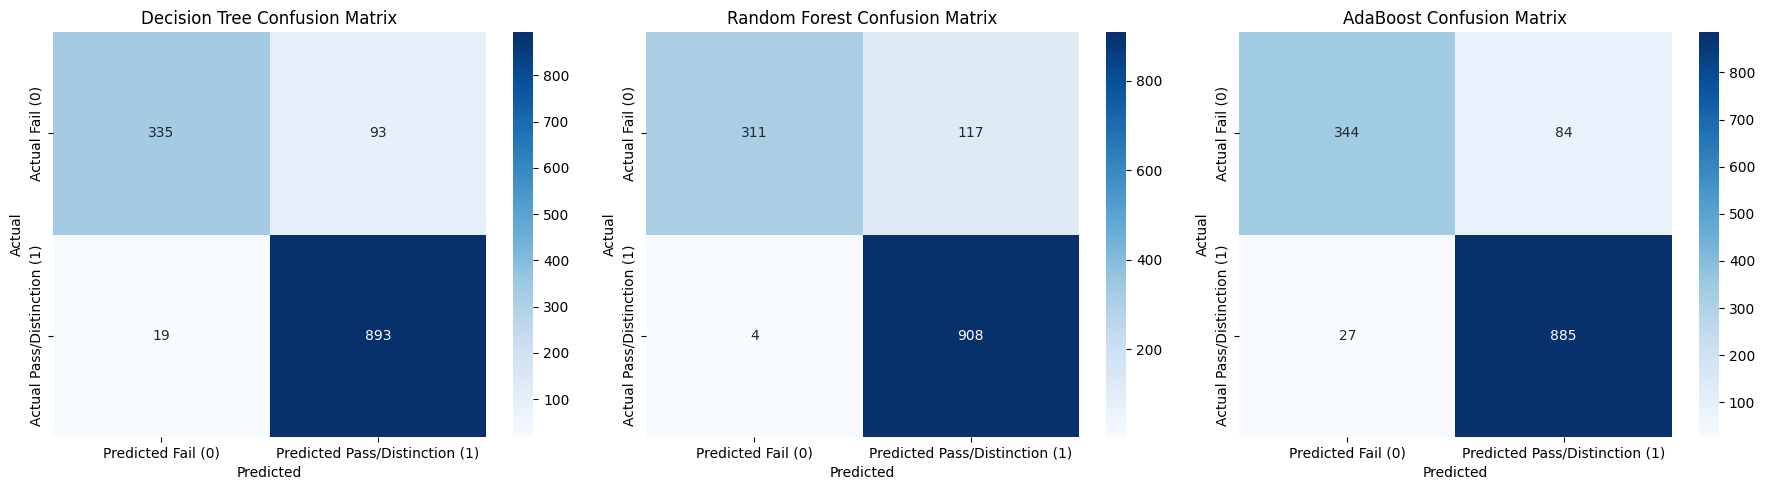

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Define the list of features
features = [
    'score', 
    'Gender', 
    'Region', 
    'HLE', 
    'Age group', 
    'Credit Distribution', 
    'assessment_completion_ratio', 
    'total_vle_clicks'
]

# Separate features and target
X = df_final[features]
y = df_final['target']

# One-hot encode categorical variables to convert them into numeric features.
# Adjust drop_first if you want to avoid dummy variable trap.
X_encoded = pd.get_dummies(X, columns=['Gender', 'Region', 'HLE', 'Age group'], drop_first=True)

# Split the data (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------
# 1. Decision Tree Classifier
# -------------------------------
clf_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)

# -------------------------------
# 2. Random Forest Classifier
# -------------------------------
clf_rf = RandomForestClassifier(
    n_estimators=100, max_depth=3, random_state=42,
    bootstrap=True, oob_score=True
)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(cm_rf)

# -------------------------------
# 3. AdaBoost Classifier
# -------------------------------
# Use the new parameter 'estimator' for the base learner
clf_ab = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100, random_state=42
)
clf_ab.fit(X_train, y_train)
y_pred_ab = clf_ab.predict(X_test)
cm_ab = confusion_matrix(y_test, y_pred_ab)
print("\nAdaBoost Confusion Matrix:")
print(cm_ab)

# -------------------------------
# Plot all three confusion matrices side-by-side
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = ['Decision Tree', 'Random Forest', 'AdaBoost']
cms = [cm_dt, cm_rf, cm_ab]

for ax, model, cm in zip(axes, models, cms):
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues', ax=ax,
        xticklabels=["Predicted Fail (0)", "Predicted Pass/Distinction (1)"],
        yticklabels=["Actual Fail (0)", "Actual Pass/Distinction (1)"]
    )
    ax.set_title(f"{model} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    
plt.tight_layout()
plt.show()
